# Sentiment distribution and Topic modeling result analysis

After collecting sentiment labels and topic labels, in file "Topic_df_with_sentiments.csv", we need to parse this data into LIWC tool to get the resulting file LIWC_Sentiment_topics.csv, it contains the data+sentiment labels+topic labels+ liwc attributes.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import chi2_contingency


In [2]:
df = pd.read_csv("LIWC_Sentiment_topics.csv") # dataframe with LIWC attributes, sentiment labels and topics
topic_df = pd.read_csv("Topic_representation.csv") # representation of topics from "2. Topic_modeling_BERTopic.py"


In [3]:
df.head(2)

,ids,clean_text,topic,probs,sentiments,users,created_utc,negative,neutral,positive,...,nonflu,filler,AllPunc,Period,Comma,QMark,Exclam,Apostro,OtherP,Emoji
0,1950591,Just rescued an Australian Cattle Dog Blue Hee...,0,0.539362,neutral,clinical,1361727119,0.043026,0.809415,0.147559,...,0.0,0.0,0,0,0,0,0,0,0,0
1,1950591,I see where you re coming from and I m judging...,1937,0.000000,neutral,clinical,1369051472,0.147034,0.504005,0.348961,...,0.0,0.0,0,0,0,0,0,0,0,0


In [4]:
print("Null values in data:",df.isna().sum().any())
print("shape of data:",df.shape)
print("\n")
print("Percentage of users in groups:",np.round(df.users.value_counts(normalize=True).mul(100),2))
print("\n")
print("number of unique users in groups:",df.groupby('users')['ids'].nunique())

Null values in data: False
shape of data: (559603, 129)


Percentage of users in groups: users
control     65.11
clinical    34.89
Name: proportion, dtype: float64


number of unique users in groups: users
clinical    1316
control     1316
Name: ids, dtype: int64


In [5]:
# average number of words per post and standard deviation for groups and overall
print("average number of words per posts for groups:","\n",
      df.groupby('users')['WC'].agg(['mean','std']))
print("\n")
print("average number of words per posts whole data:","\n",
      df['WC'].agg(['mean','std']))

average number of words per posts for groups: 
                mean        std
users                         
clinical  35.454226  38.200214
control   24.801418  29.251082


average number of words per posts whole data: 
 mean    28.517697
std     33.045134
Name: WC, dtype: float64


In [6]:
# average number of posts per user
print("average number of posts per user in groups","\n",
      df.groupby('ids')['users'].value_counts().reset_index().groupby('users')['count'].agg(['mean','std']))

average number of posts per user in groups 
                 mean         std
users                           
clinical  148.343465   78.113366
control   276.886778  145.863492


In [7]:
# average number of posts per user
print("average number of posts per user in whole data","\n",
      df.groupby('ids')['users'].value_counts().reset_index()['count'].agg(['mean','std']))

average number of posts per user in whole data 
 mean    212.615122
std     133.477118
Name: count, dtype: float64


# Sentiment Analysis

In [8]:
__temp = np.round(((df.groupby('users').sentiments.value_counts(normalize=True))*100),2).rename('percent')
__temp = __temp.reset_index()

__temp['users'] = __temp['users'].replace('clinical', 'depression')
__temp

,users,sentiments,percent
0,depression,neutral,47.88
1,depression,negative,27.64
2,depression,positive,24.48
3,control,neutral,58.17
4,control,negative,21.47
5,control,positive,20.36


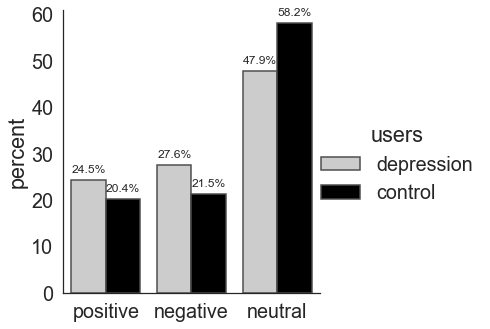

In [9]:
custom_grayscale_palette = ["#cccccc", "#000000"]

# Create a Seaborn plot with the custom grayscale palette
sns.set(style="white", palette=custom_grayscale_palette)
sns.set_context("notebook", font_scale=1.8)

# Create the catplot with the specified palette
g = sns.catplot(data=__temp, x='sentiments', y='percent', hue='users', 
                kind='bar',linewidth=1.5,edgecolor=".3", palette=custom_grayscale_palette,
                order=["positive", "negative", "neutral"])
# Add percentage values on top of the bars with one-digit precision, skipping zero-height bars
for p in g.ax.patches:
    height = p.get_height()
    if height > 0:  # Only annotate if the height is greater than zero
        g.ax.annotate(f'{height:.1f}%', (p.get_x() + p.get_width() / 2., height),
                      ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=12)

# Remove title and x-axis labels
g.fig.suptitle("")
g.set_xlabels("")

# Show the plot
plt.show()


## we can see the sentiment distribution differences between groups. Let's see the significance by performing a statistical chi-2 test:

In [10]:
# lets use the not-normalized numbers
print(df.groupby('users').sentiments.value_counts())
print("\n")

data = [
    [93477, 53955, 47788],  # clinical
    [211969, 78225, 74189]  # control
]

# Performing the Chi-square test
chi2, p, dof, expected = chi2_contingency(data)

chi2, p, dof, expected

print("Result of Chi2-test:")
print("chi2(2) =",chi2,"\n"
      "p-value =",p,"\n"
      "degree of freedom =",dof)

print('\n')

if p<0.001:
    print("the variation in sentiment distribution is statistically significant")
else:
    print("No significant difference")



users     sentiments
clinical  neutral        93477
          negative       53955
          positive       47788
control   neutral       211969
          negative       78225
          positive       74189
Name: count, dtype: int64


Result of Chi2-test:
chi2(2) = 5503.789856858513 
p-value = 0.0 
degree of freedom = 2


the variation in sentiment distribution is statistically significant


# Topic analysis

In [11]:
print("Number of topics:",df.topic.nunique())

Number of topics: 4187


In [12]:
df.groupby('users').topic.nunique()

users
clinical    4174
control     4187
Name: topic, dtype: int64

In [13]:
topic_df

,Topic,Count,Name,Representation,Representative_Docs
0,-1,1418,-1_marn_mrn_faithlessness_fetaljuice,"['marn', 'mrn', 'faithlessness', 'fetaljuice',...","['r oddlysatisfying perhaps', 'FetaljuiceFetal..."
1,0,4634,0_cat_dog_dogs_cats,"['cat', 'dog', 'dogs', 'cats', 'kitten', 'pupp...","['Find the cat', 'Does my cat like me', 'Dog T..."
2,1,2628,1_relationship_ex_her_she,"['relationship', 'ex', 'her', 'she', 'feelings...","['What does one do in a relationship exactly',..."
3,2,2176,2_keys_steam_karambit_float,"['keys', 'steam', 'karambit', 'float', 'mw', '...",['karambit blue gem ft keysGot another great l...
4,3,1894,3_trump_bernie_hillary_vote,"['trump', 'bernie', 'hillary', 'vote', 'obama'...",['You all seem like you would be great for the...
...,...,...,...,...,...
4182,4181,16,4181_firemaking_firemakingi_skill_points,"['firemaking', 'firemakingi', 'skill', 'points...",['in FiremakingI now have at least experience ...
4183,4182,16,4182_random_teayeon_wgm_socialise,"['random', 'teayeon', 'wgm', 'socialise', 'hyp...","['I ll take a random please', 'I ll take a ran..."
4184,4183,15,4183_plz_ninetails_pls_online,"['plz', 'ninetails', 'pls', 'online', 'sandsla...","['go online plz', 'go online plz', 'Could you ..."
4185,4184,15,4184_wonderlocke_pok_mon_episode,"['wonderlocke', 'pok', 'mon', 'episode', 'labc...","['Pok mon Y WonderLocke Episode No Flying', 'P..."


In [14]:
m = df.groupby('users').topic.value_counts(normalize=True).mul(100).reset_index()


In [15]:
m['users'] = m['users'].replace('clinical', 'depression')

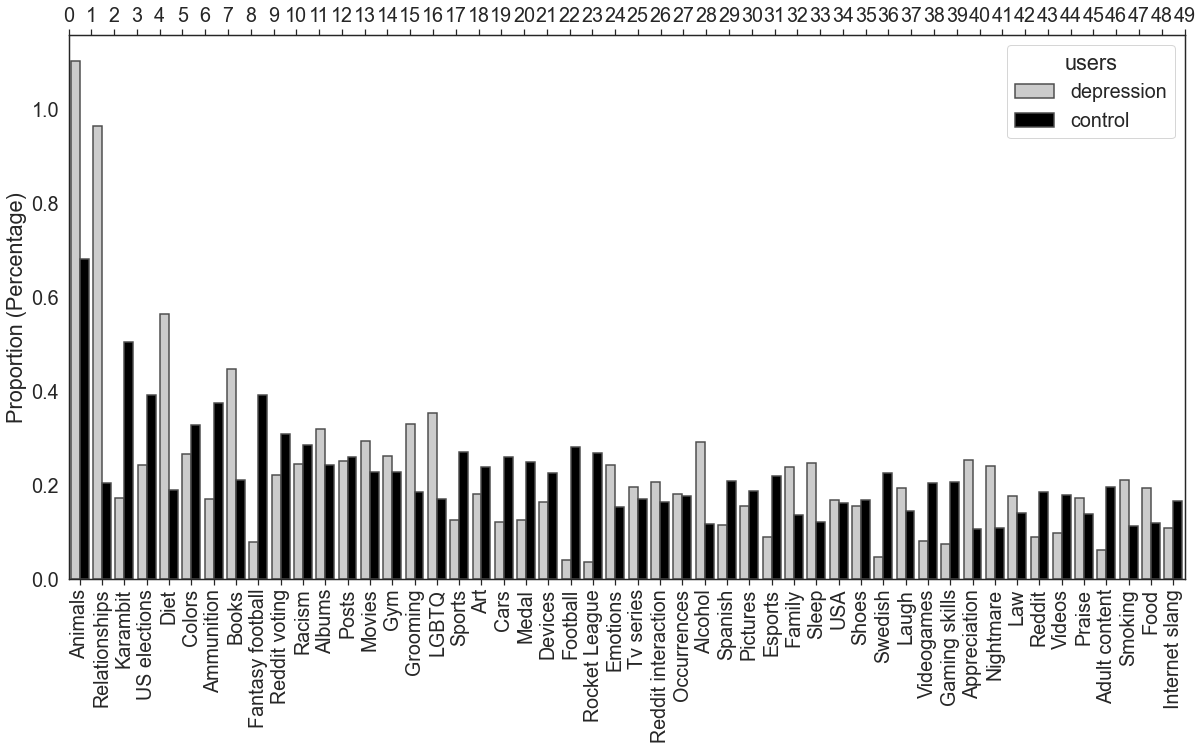

In [16]:
topics_ = ["Animals","Relationships","Karambit","US elections","Diet","Colors","Ammunition","Books","Fantasy football",
"Reddit voting","Racism","Albums","Posts","Movies","Gym","Grooming","LGBTQ","Sports","Art",
"Cars","Medal","Devices","Football","Rocket League","Emotions","Tv series","Reddit interaction",
"Occurrences","Alcohol","Spanish","Pictures","Esports","Family","Sleep","USA","Shoes","Swedish",
"Laugh","Videogames","Gaming skills","Appreciation","Nightmare","Law","Reddit","Videos",
"Praise","Adult content","Smoking","Food","Internet slang"]

data_m = m[(m['topic']<=49)]
data_m = data_m[(data_m['topic']!=-1)]
# Create bar plot
sns.set(rc={'figure.figsize': (20, 10)})
sns.set_style("white")
sns.set_context("notebook", font_scale=1.8)

ax = sns.barplot(x='topic', y='proportion', data=data_m, hue='users',linewidth=1.5,edgecolor=".3",
                 palette=custom_grayscale_palette)

# Set x-axis ticks and labels with different rotations
custom_ticks = list(range(len(topics_)))
ax.set_xticks(custom_ticks)
ax.set_xticklabels([])  # Clear the default x-axis labels

# Create a secondary x-axis for numbers
ax2 = ax.twiny()
ax2.set_xticks(custom_ticks)
ax2.set_xticklabels(custom_ticks, rotation=0, ha='center')

# Rotate and set x-axis labels as one-word representations
ax.set_xticklabels(topics_, rotation=90, ha='center')
# Remove x-axis label (sentiments)
ax.set_ylabel('Proportion (Percentage)')

# Remove x-axis label
ax.set_xlabel('')
ax2.set_xlabel('')# Save the figure in vector graphics format (PDF) with a transparent background
#plt.savefig("topic_distribution_font.pdf", format='pdf', transparent=True,bbox_inches="tight", pad_inches=0.1, dpi=300)


plt.show()

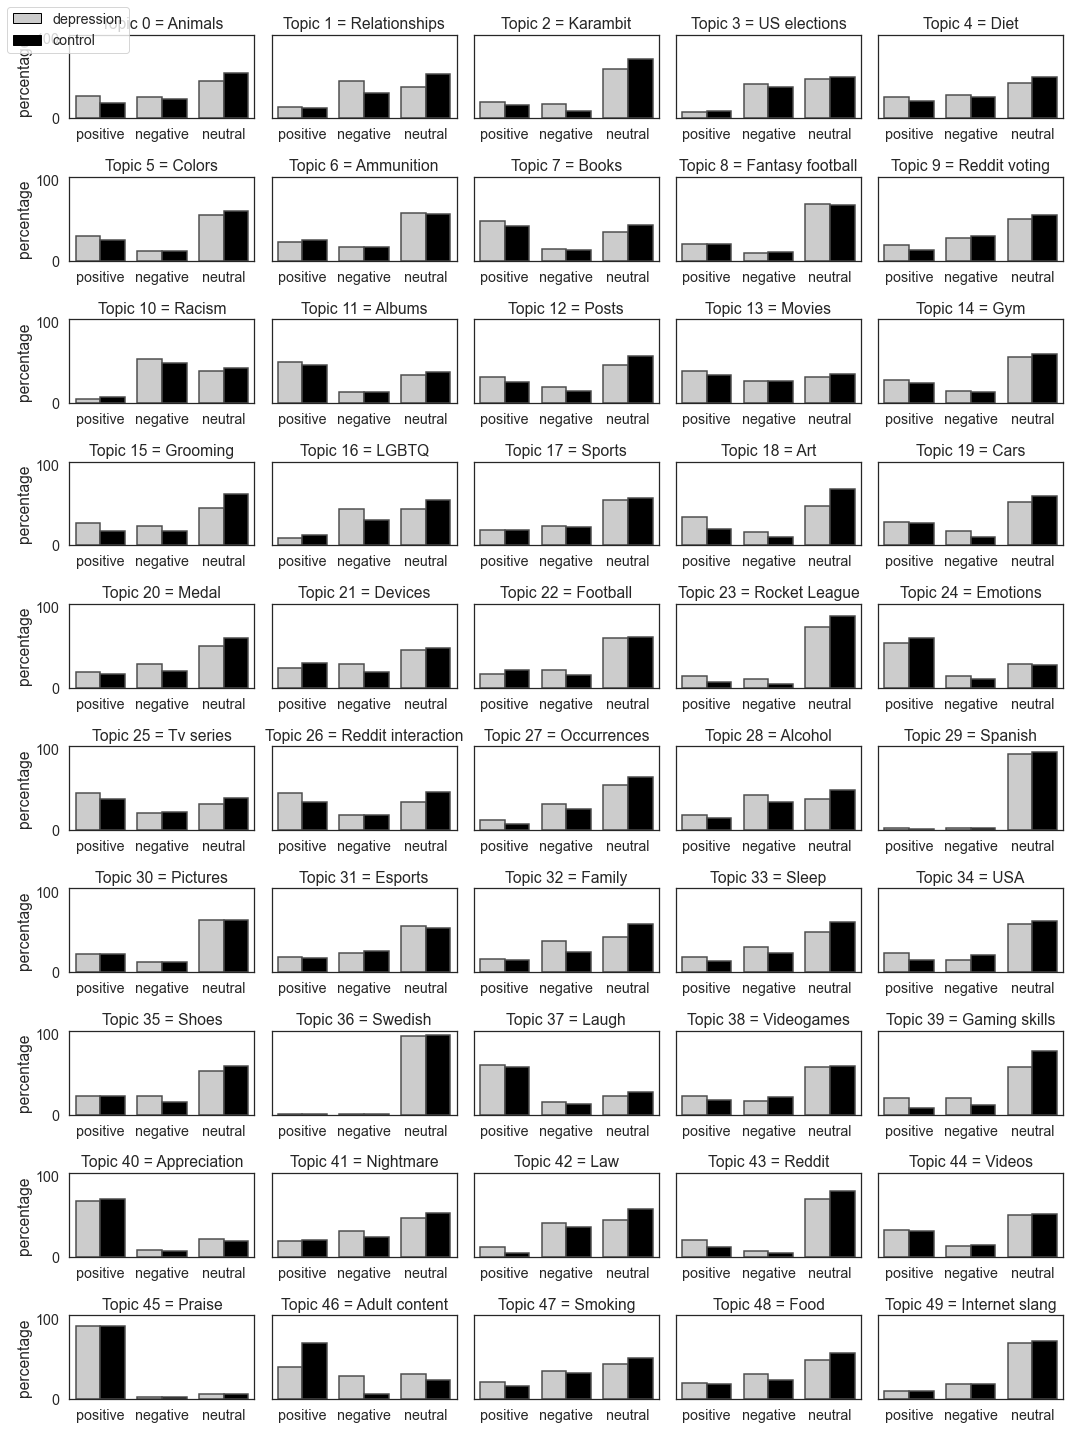

In [17]:
from matplotlib.patches import Rectangle

custom_grayscale_palette = ["#cccccc", "#000000"]
sns.set(style="white", palette=custom_grayscale_palette)

legend_labels = ['depression', 'control']
legend_colors = custom_grayscale_palette

sns.set_context("notebook", font_scale=1.3)

sentiments_percentage = df.groupby(['topic', 'users'])['sentiments'].value_counts(normalize=True).mul(100).reset_index(name='percentage')

x = sentiments_percentage[sentiments_percentage['topic'].isin(range(50))]

topics = ["Animals","Relationships","Karambit","US elections","Diet","Colors","Ammunition","Books","Fantasy football",
"Reddit voting","Racism","Albums","Posts","Movies","Gym","Grooming","LGBTQ","Sports","Art",
"Cars","Medal","Devices","Football","Rocket League","Emotions","Tv series","Reddit interaction",
"Occurrences","Alcohol","Spanish","Pictures","Esports","Family","Sleep","USA","Shoes","Swedish",
"Laugh","Videogames","Gaming skills","Appreciation","Nightmare","Law","Reddit","Videos",
"Praise","Adult content","Smoking","Food","Internet slang"]


# Create subplots
fig, axes = plt.subplots(10, 5, figsize=(15, 20), sharey=True)
axes = axes.ravel()

for i, topic in enumerate(x['topic'].unique()):
    sns.barplot(
        data=x[x['topic'] == topic],
        x='sentiments',
        y='percentage',
        hue='users',
        ax=axes[i],
        order=['positive', 'negative', 'neutral'],linewidth=1.5,edgecolor=".3",
        palette=custom_grayscale_palette,
    )
    axes[i].set_title(f"Topic {topic} = {topics[topic]}")
    axes[i].set_xlabel(None)  # Remove x-axis label
    axes[i].legend().set_visible(False)  # Hide individual legends
    
# Create custom legend with rectangular box and outline
legend_elements = [
    Rectangle((0, 0), 1, 1, color=color, label=label) for label, color in zip(legend_labels, legend_colors)
]

# Set the outline for each legend rectangle
for rect in legend_elements:
    rect.set_edgecolor('black')
    rect.set_linewidth(1)

fig.legend(handles=legend_elements, loc='upper left')

plt.tight_layout()
#plt.savefig("top_50_topic_sentiment.pdf", format='pdf', transparent=True, bbox_inches="tight", pad_inches=0.1, dpi=300)

plt.show()